In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanicds/train.csv
/kaggle/input/titanicds/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("/kaggle/input/titanicds/train.csv")
test = pd.read_csv("/kaggle/input/titanicds/test.csv")
pid = test['PassengerId']


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

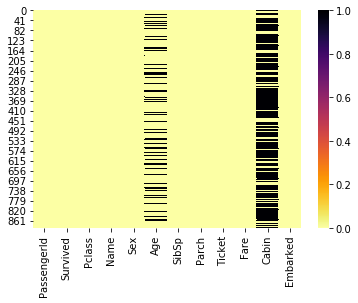

In [8]:
sns.heatmap(train.isnull(),cmap = 'inferno_r')

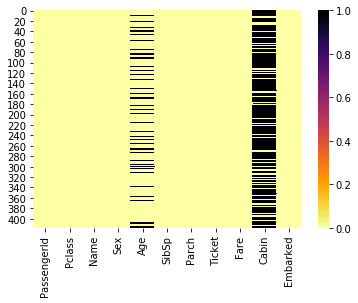

In [9]:
sns.heatmap(test.isnull(),cmap = 'inferno_r')


In [10]:
train = train.drop(['Cabin','PassengerId',],axis = 1)

In [11]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
test = test.drop(['Cabin','PassengerId',],axis = 1)

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


In [14]:
test.shape

(418, 9)

In [15]:
train.shape

(891, 10)

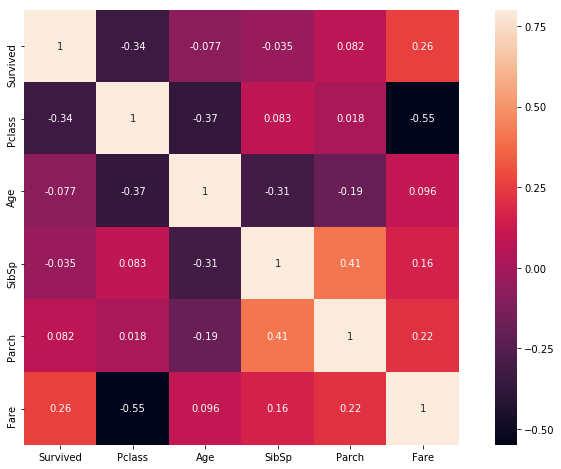

In [16]:
plt.figure(figsize = (13,8))
sns.heatmap(train.corr(),vmax = 0.8,square = True,annot = True)
plt.show()

In [17]:
train.Age.fillna(train.Age.mean(),inplace = True)

In [18]:
train['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

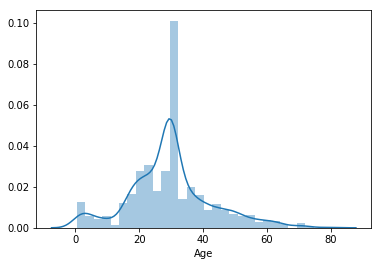

In [19]:
sns.distplot(train['Age'])

In [20]:
train['Age'].skew()

0.4344880940129925

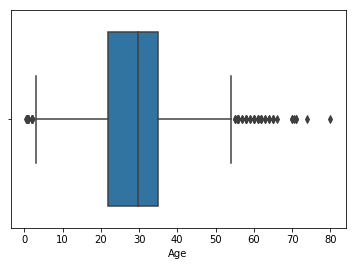

In [21]:
sns.boxplot(x = train['Age'])

In [22]:
q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)
irq = q3 - q1
l = q1 - 1.5 * irq
h = q3 + 1.5 * irq
train.Age.loc[train['Age'] > high ] = high
train.Age.loc[train['Age'] < low] = low

NameError: name 'high' is not defined

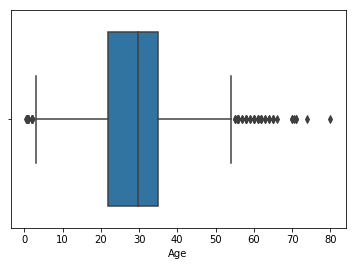

In [23]:
sns.boxplot(x = train['Age'])

In [24]:
test.Age.fillna(test.Age.mean(),inplace = True)
test['Age'].describe()

count    418.000000
mean      30.272590
std       12.634534
min        0.170000
25%       23.000000
50%       30.272590
75%       35.750000
max       76.000000
Name: Age, dtype: float64

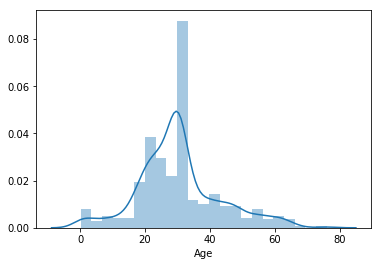

In [25]:
sns.distplot(test['Age'])

In [26]:
test['Age'].skew()

0.5127105327530369

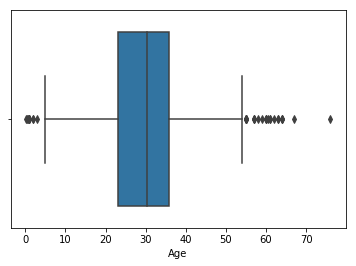

In [27]:
sns.boxplot(x = test['Age'])

In [28]:
q1 = test['Age'].quantile(0.25)
q3 = test['Age'].quantile(0.75)
irq = q3 - q1
high = q3 + 1.5 * irq
low = q1 - 1.5 * irq

In [29]:
test['Age'].describe()

count    418.000000
mean      30.272590
std       12.634534
min        0.170000
25%       23.000000
50%       30.272590
75%       35.750000
max       76.000000
Name: Age, dtype: float64

In [30]:
print(high,low)

54.875 3.875


In [31]:
test.Age.loc[test['Age'] > high ] = high
test.Age.loc[test['Age'] < low] = low

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


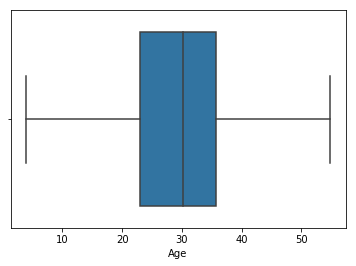

In [32]:
sns.boxplot(x = test['Age'])

In [33]:
test['Age'].describe()

count    418.000000
mean      30.028571
std       11.708117
min        3.875000
25%       23.000000
50%       30.272590
75%       35.750000
max       54.875000
Name: Age, dtype: float64

In [34]:
train['AgeGroup'] = pd.cut(train['Age'],4)

In [35]:
train[['AgeGroup','Survived']].groupby('AgeGroup').mean()

,Survived
AgeGroup,
"(0.34, 20.315]",0.458101
"(20.315, 40.21]",0.364769
"(40.21, 60.105]",0.390625
"(60.105, 80.0]",0.227273


In [36]:
train.Age.loc[train['Age'] <= 16] = 0

In [37]:
train['Age'].describe()

count    891.000000
mean      28.800498
std       14.523994
min        0.000000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [38]:
train.Age.loc[(train['Age'] > 16) & (train['Age'] <= 29)] = 1

In [39]:
train.Age.loc[(train['Age'] > 29) & (train['Age'] <= 42)] = 2
train.Age.loc[(train['Age'] > 42) & (train['Age'] <= 55)] = 3

In [40]:
train['Age'] = train['Age'].astype(int)

In [41]:
train['Age']

0      1
1      2
2      1
3      2
4      2
      ..
886    1
887    1
888    2
889    1
890    2
Name: Age, Length: 891, dtype: int64

In [42]:
test['AgeGroup'] = pd.cut(test['Age'],4)

In [43]:
test.Age.loc[test['Age'] <= 16] = 0
test.Age.loc[(test['Age'] > 16) & (test['Age'] <= 29)] = 1
test.Age.loc[(test['Age'] > 29) & (test['Age'] <= 42)] = 2
test.Age.loc[(test['Age'] > 42) & (test['Age'] <= 55)] = 3

In [44]:
test['Age'].describe()

count    418.000000
mean       1.633971
std        0.843934
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: Age, dtype: float64

In [45]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,S,"(20.315, 40.21]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C,"(20.315, 40.21]"
2,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,S,"(20.315, 40.21]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,S,"(20.315, 40.21]"
4,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,S,"(20.315, 40.21]"


In [46]:
train = train.drop(['AgeGroup'],axis = 1)

In [47]:
test.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,3,"Kelly, Mr. James",male,2.0,0,0,330911,7.8292,Q,"(29.375, 42.125]"
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,3.0,1,0,363272,7.0000,S,"(42.125, 54.875]"
2,2,"Myles, Mr. Thomas Francis",male,3.0,0,0,240276,9.6875,Q,"(42.125, 54.875]"
3,3,"Wirz, Mr. Albert",male,1.0,0,0,315154,8.6625,S,"(16.625, 29.375]"
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1.0,1,1,3101298,12.2875,S,"(16.625, 29.375]"
5,3,"Svensson, Mr. Johan Cervin",male,0.0,0,0,7538,9.2250,S,"(3.824, 16.625]"
6,3,"Connolly, Miss. Kate",female,2.0,0,0,330972,7.6292,Q,"(29.375, 42.125]"
7,2,"Caldwell, Mr. Albert Francis",male,1.0,1,1,248738,29.0000,S,"(16.625, 29.375]"
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,1.0,0,0,2657,7.2292,C,"(16.625, 29.375]"
9,3,"Davies, Mr. John Samuel",male,1.0,2,0,A/4 48871,24.1500,S,"(16.625, 29.375]"


In [48]:
test = test.drop(['AgeGroup'],axis = 1)

In [49]:
test['Age'] = test['Age'].astype(int)

In [50]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,2,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,3,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,3,0,0,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",male,1,0,0,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,1,3101298,12.2875,S


In [51]:
test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [52]:
test.Fare.fillna(test.Fare.median(),inplace = True)
test['Fare'].describe()

count    418.000000
mean      35.576535
std       55.850103
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max      512.329200
Name: Fare, dtype: float64

In [53]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

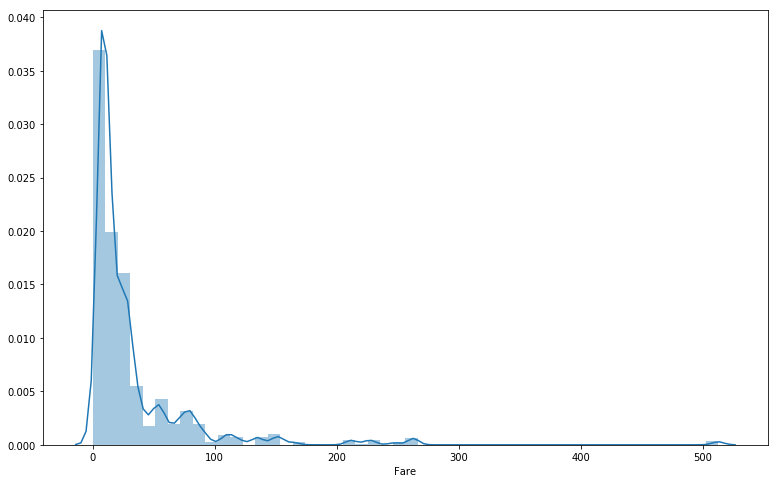

In [54]:
plt.figure(figsize = (13,8))
sns.distplot(train['Fare'])
plt.show()

In [55]:
train['Fare'].skew()

4.787316519674893

In [56]:
train['Fare']  = train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

In [57]:
train['Fare'].skew()

0.44310881405404506

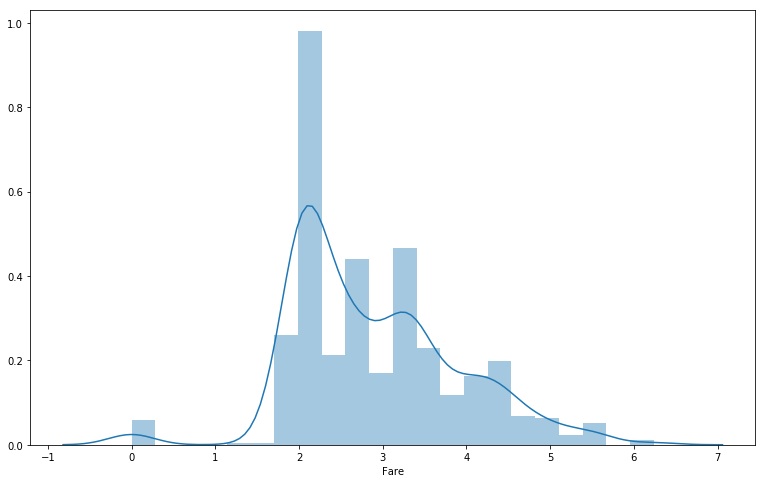

In [58]:
plt.figure(figsize = (13,8))
sns.distplot(train['Fare'])
plt.show()

In [59]:
test['Fare'].skew()

3.6922987243405156

In [60]:
test['Fare']  = test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
test['Fare'].skew()

0.8400057760870036

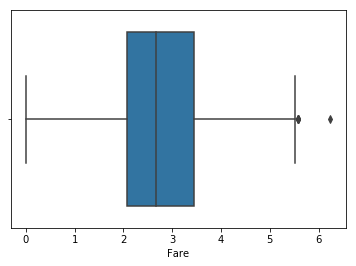

In [61]:
sns.boxplot(x = test['Fare'])

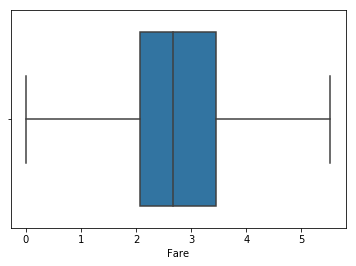

In [62]:
irq = test['Fare'].quantile(0.75) - test['Fare'].quantile(0.25)
h = test['Fare'].quantile(0.75) + 1.5 * irq
test.Fare.loc[test['Fare'] > h] = h
sns.boxplot(x = test['Fare'])

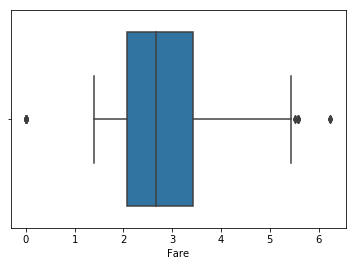

In [63]:
sns.boxplot(x = train['Fare'])

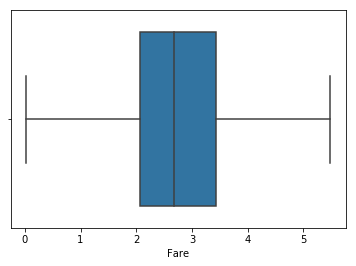

In [64]:
irq = train['Fare'].quantile(0.75) - train['Fare'].quantile(0.25)
h = train['Fare'].quantile(0.75) + 1.5 * irq
train.Fare.loc[train['Fare'] > h] = h
l = train['Fare'].quantile(0.25) - 1.5 * irq
train.Fare.loc[train['Fare'] < l] = l
sns.boxplot(x = train['Fare'])

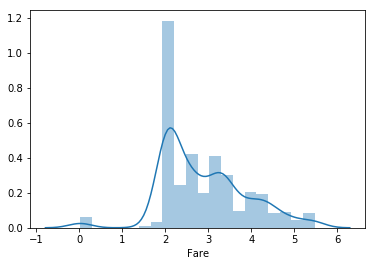

In [65]:
sns.distplot(train['Fare'])

In [66]:
train['Fare'].skew()

0.3906768140673063

In [67]:
test['Fare'].skew()

0.8044336364434226

In [68]:
train['FareGroup'] = pd.cut(train['Fare'],4)

In [69]:
train['FareGroup'].head(10)

0    (1.385, 2.751]
1    (4.117, 5.483]
2    (1.385, 2.751]
3    (2.751, 4.117]
4    (1.385, 2.751]
5    (1.385, 2.751]
6    (2.751, 4.117]
7    (2.751, 4.117]
8    (1.385, 2.751]
9    (2.751, 4.117]
Name: FareGroup, dtype: category
Categories (4, interval[float64]): [(0.014, 1.385] < (1.385, 2.751] < (2.751, 4.117] < (4.117, 5.483]]

In [70]:
train[['FareGroup','Survived']].groupby('FareGroup').mean()

,Survived
FareGroup,
"(0.014, 1.385]",0.066667
"(1.385, 2.751]",0.258696
"(2.751, 4.117]",0.474576
"(4.117, 5.483]",0.677686


In [71]:
train.Fare.loc[train['Fare'] <= 1.4] = 0
train.Fare.loc[(train['Fare'] > 1.4) & (train['Fare'] <= 2.8)] = 1
train.Fare.loc[(train['Fare'] > 2.8) & (train['Fare'] <= 4.1)] = 2
train.Fare.loc[(train['Fare'] > 4.1) & (train['Fare'] <= 5.5)] = 3

In [72]:
train['Fare'] = train['Fare'].astype(int)

In [73]:
train['Fare'].head()

0    1
1    3
2    1
3    2
4    1
Name: Fare, dtype: int64

In [74]:
test['FareGroup'] = pd.cut(test['Fare'],4)

In [75]:
test['FareGroup'].unique

<bound method Series.unique of 0      (1.381, 2.762]
1      (1.381, 2.762]
2      (1.381, 2.762]
3      (1.381, 2.762]
4      (1.381, 2.762]
            ...      
413    (1.381, 2.762]
414    (4.142, 5.523]
415    (1.381, 2.762]
416    (1.381, 2.762]
417    (2.762, 4.142]
Name: FareGroup, Length: 418, dtype: category
Categories (4, interval[float64]): [(-0.00552, 1.381] < (1.381, 2.762] < (2.762, 4.142] < (4.142, 5.523]]>

In [76]:
test.Fare.loc[test['Fare'] <= 1.4] = 0
test.Fare.loc[(test['Fare'] > 1.4) & (test['Fare'] <= 2.8)] = 1
test.Fare.loc[(test['Fare'] > 2.8) & (test['Fare'] <= 4.1)] = 2
test.Fare.loc[(test['Fare'] > 4.1) & (test['Fare'] <= 5.6)] = 3

In [77]:
test['Fare'] = test['Fare'].astype(int)

In [78]:
test['Fare'].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    2
8    1
9    2
Name: Fare, dtype: int64

In [79]:
train = train.drop(['FareGroup'],axis = 1)
test = test.drop(['FareGroup'],axis = 1)

In [80]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [81]:
train = train.drop(['Name','Ticket'],axis = 1)
test = test.drop(['Name','Ticket'],axis = 1)


In [82]:
train.shape

(891, 8)

In [83]:
test.shape

(418, 7)

In [84]:
train.dtypes

Survived     int64
Pclass       int64
Sex         object
Age          int64
SibSp        int64
Parch        int64
Fare         int64
Embarked    object
dtype: object

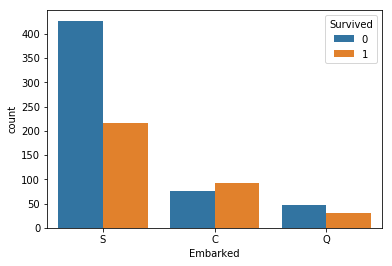

In [85]:
sns.countplot(x = 'Embarked',hue = 'Survived',data = train)

In [86]:
train['Embarked'].isnull().sum()

2

In [87]:
train.Embarked.fillna(train.Embarked.mode()[0],inplace = True)
train['Embarked'].isnull().sum()

0

In [88]:
train[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


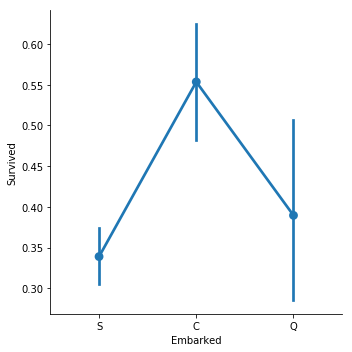

In [89]:
sns.factorplot(x =  'Embarked', y = 'Survived', data = train,type = 'bar')

In [90]:
train['Embarked'] = train['Embarked'].map({'S' : 0,'Q' : 1,'C' : 2})

In [91]:
train.dtypes

Survived     int64
Pclass       int64
Sex         object
Age          int64
SibSp        int64
Parch        int64
Fare         int64
Embarked     int64
dtype: object

In [92]:
test['Embarked'] = test['Embarked'].map({'S' : 0,'Q' : 1,'C' : 2})

In [93]:
test.dtypes

Pclass       int64
Sex         object
Age          int64
SibSp        int64
Parch        int64
Fare         int64
Embarked     int64
dtype: object

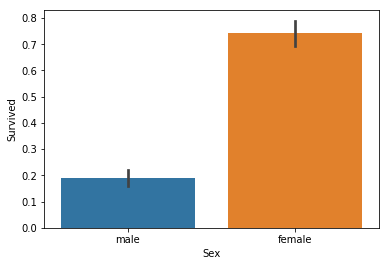

In [94]:
sns.barplot(x = 'Sex' , y = 'Survived', data = train)

In [95]:
train['Sex'] = train['Sex'].map({'male' : 0,'female' : 1})
test['Sex'] = test['Sex'].map({'male' : 0,'female' : 1})

In [96]:
train.dtypes

Survived    int64
Pclass      int64
Sex         int64
Age         int64
SibSp       int64
Parch       int64
Fare        int64
Embarked    int64
dtype: object

In [97]:
test.dtypes

Pclass      int64
Sex         int64
Age         int64
SibSp       int64
Parch       int64
Fare        int64
Embarked    int64
dtype: object

In [98]:
train['Family'] = train['SibSp'] + train['Parch'] + 1
test['Family'] = test['SibSp'] + test['Parch'] + 1

In [99]:
train.dtypes

Survived    int64
Pclass      int64
Sex         int64
Age         int64
SibSp       int64
Parch       int64
Fare        int64
Embarked    int64
Family      int64
dtype: object

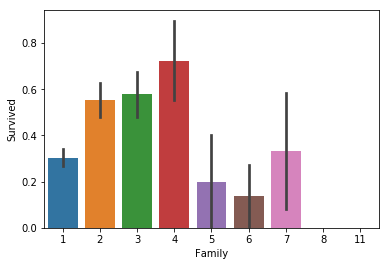

In [100]:
sns.barplot(x = 'Family', y = 'Survived',data = train)

In [101]:
train[['Family','Survived']].groupby('Family').mean()

,Survived
Family,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [102]:
train = train.drop(['Parch','SibSp'],axis = 1)
test = test.drop(['Parch','SibSp'],axis = 1)

In [103]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family'], dtype='object')

In [104]:
test.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family'], dtype='object')

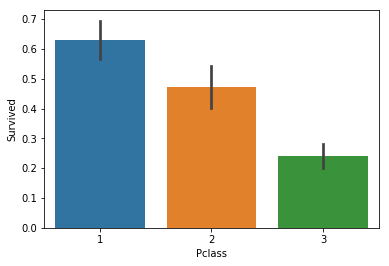

In [105]:
sns.barplot(x = 'Pclass', y = 'Survived',data = train)

In [106]:
y_train = train['Survived']

In [107]:
train = train.drop(['Survived'], axis = 1)

In [108]:
X_train = train
X_test = test

In [109]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,0,1,1,0,2
1,1,1,2,3,2,2
2,3,1,1,1,0,1
3,1,1,2,2,0,2
4,3,0,2,1,0,1


In [110]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,0,2,1,1,1
1,3,1,3,1,0,2
2,2,0,3,1,1,1
3,3,0,1,1,0,1
4,3,1,1,1,0,3


In [111]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [113]:
RFC = RandomForestClassifier()

rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=10, scoring="accuracy", n_jobs= -1)
gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_
gsRFC.best_params_
gsRFC.best_score_

0.8103254769921436

In [114]:
RFC_best

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [115]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state = 0)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=10, scoring="accuracy", n_jobs= -1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_

gsadaDTC.best_score_


0.7946127946127947

In [116]:
xgc = XGBClassifier(silent = False,scale_pos_weight = 3,learning_rate = 0.04,colsample_bytree = 0.8,subsample = 0.8,n_estimators = 500,reg_alpha = 0.3,max_depth = 9,gamma = 1)
xgc.fit(X_train,y_train)
xgc.score(X_train,y_train)

0.8271604938271605

In [117]:
knn = KNeighborsClassifier()
n_neighbors = [6,7,8,9,10,11,12,14,16,18,20,22]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = list(range(1,50,5))
hyperparams = {'algorithm': algorithm,
               'weights': weights,
               'leaf_size': leaf_size,
               'n_neighbors': n_neighbors}

gsKNN=GridSearchCV(estimator = knn, param_grid = hyperparams, verbose=1, cv=10, scoring = "roc_auc", n_jobs=-1)

gsKNN.fit(X_train, y_train)

knn_best = gsKNN.best_estimator_

gsKNN.best_params_
gsKNN.best_score_

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2380 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:    7.7s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8559334268913723

In [118]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=10, scoring="accuracy", n_jobs= -1, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

gsGBC.best_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   37.5s finished


0.8035914702581369

In [119]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=10, scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_

gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   24.2s finished


0.8125701459034792

In [120]:
vc = VotingClassifier(estimators = [('rfc',RFC_best),('dtc',ada_best),('gbc',GBC_best),('svc',SVMC_best)],voting = 'soft',n_jobs = -1)
vc.fit(X_train,y_train)
vc.score(X_train,y_train)

0.8585858585858586

In [121]:
y_predvc = vc.predict(X_test)
y_predvc = pd.DataFrame(y_predvc,columns = ["Survived"])
ansvc = pd.concat([pid,y_predvc],axis = 1)
ansvc.to_csv("subtitanicvc.csv",index = False)

In [122]:
y_predrf = gsRFC.predict(X_test)

In [123]:
y_pred = xgc.predict(X_test)

In [124]:
y_pred = pd.DataFrame(y_pred,columns = ["Survived"])


In [125]:
y_predrf = pd.DataFrame(y_predrf,columns = ["Survived"])

In [126]:
ans = pd.concat([pid,y_pred],axis = 1)
ans.to_csv("subtitanic.csv",index = False)

In [127]:
ansrf = pd.concat([pid,y_predrf],axis = 1)
ansrf.to_csv("subtitanicrf.csv",index = False)

In [128]:
y_predknn = gsKNN.predict(X_test)
y_predknn = pd.DataFrame(y_predknn,columns = ["Survived"])
ansknn = pd.concat([pid,y_predknn],axis = 1)
ansknn.to_csv("subtitanicknn.csv",index = False)

In [129]:
y_predgsSVMC = gsSVMC.predict(X_test)
y_predgsSVMC = pd.DataFrame(y_predgsSVMC,columns = ["Survived"])
ansgsSVMC = pd.concat([pid,y_predgsSVMC],axis = 1)
ansgsSVMC.to_csv("subtitanicgsSVMC.csv",index = False)